### Importing required libaries

In [49]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv('C:/Users/MUILI OLANREWAJU/Research Thesis/Data/Processed data/sinkhole_data.csv')
df.head(5)

,ID,Sinkhole,Land use,Substrate,DTS,DTM,HD,Depth to Bedrock,DTF,DWTSA,DTD
0,0,1,3,2,5820.93,27217.5,-13,-344,104275.0,1,240.000
1,1,1,3,2,6814.82,28740.6,-16,-343,104593.0,2,90.000
2,2,1,4,2,5499.25,27449.7,-18,-341,103620.0,5,510.882
3,3,1,3,2,8020.39,30084.3,-13,-344,105306.0,1,313.209
4,4,1,3,2,6759.86,31744.1,-13,-342,105015.0,2,300.000


### Understanding the data

In [51]:
df.columns

Index(['ID', 'Sinkhole', 'Land use', 'Substrate', 'DTS', 'DTM', 'HD',
       'Depth to Bedrock', 'DTF', 'DWTSA', 'DTD'],
      dtype='object')

In [52]:
df.shape

(4312, 11)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                4312 non-null   int64  
 1   Sinkhole          4312 non-null   int64  
 2   Land use          4312 non-null   int64  
 3   Substrate         4312 non-null   int64  
 4   DTS               4312 non-null   float64
 5   DTM               4312 non-null   float64
 6   HD                4312 non-null   int64  
 7   Depth to Bedrock  4312 non-null   int64  
 8   DTF               4312 non-null   float64
 9   DWTSA             4312 non-null   int64  
 10  DTD               4312 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 370.7 KB


In [54]:
df.describe(include='all')

,ID,Sinkhole,Land use,Substrate,DTS,DTM,HD,Depth to Bedrock,DTF,DWTSA,DTD
count,4312.000000,4312.000000,4312.000000,4312.000000,4312.000000,4312.000000,4312.000000,4312.000000,4312.000000,4312.000000,4312.000000
mean,1083.524351,0.525510,2.157931,3.228896,7043.243441,12471.473658,9.985390,-67.419991,33767.352270,3.425093,695.466650
std,628.902970,0.499407,1.273123,1.465372,5498.168388,7777.398947,17.763061,120.780108,25744.681949,7.454833,780.056493
min,0.000000,0.000000,1.000000,1.000000,0.000000,127.279000,-42.000000,-397.000000,0.000000,0.000000,0.000000
25%,541.000000,0.000000,1.000000,2.000000,2535.662500,6987.677500,-1.000000,-169.000000,13453.000000,0.000000,152.971000
50%,1081.000000,1.000000,2.000000,3.000000,5937.155000,10801.600000,7.000000,-11.000000,27284.600000,0.000000,450.999000
75%,1620.250000,1.000000,3.000000,5.000000,10549.500000,16037.450000,18.000000,20.000000,46826.650000,4.000000,955.300750
max,2276.000000,1.000000,5.000000,5.000000,29763.400000,42612.600000,98.000000,102.000000,105306.000000,90.000000,5908.710000


In [55]:
df.isna().sum()

ID                  0
Sinkhole            0
Land use            0
Substrate           0
DTS                 0
DTM                 0
HD                  0
Depth to Bedrock    0
DTF                 0
DWTSA               0
DTD                 0
dtype: int64

### Preprocessing the data

In [56]:
# Slice relevant columns
df = df[df.columns[1:]]
df

,Sinkhole,Land use,Substrate,DTS,DTM,HD,Depth to Bedrock,DTF,DWTSA,DTD
0,1,3,2,5820.93,27217.50,-13,-344,104275.0,1,240.0000
1,1,3,2,6814.82,28740.60,-16,-343,104593.0,2,90.0000
2,1,4,2,5499.25,27449.70,-18,-341,103620.0,5,510.8820
3,1,3,2,8020.39,30084.30,-13,-344,105306.0,1,313.2090
4,1,3,2,6759.86,31744.10,-13,-342,105015.0,2,300.0000
...,...,...,...,...,...,...,...,...,...,...
4307,0,1,5,18679.70,5711.36,3,24,44623.6,24,42.4264
4308,0,1,1,4170.11,7396.38,3,29,29154.7,0,212.1320
4309,0,5,5,14562.40,6745.47,4,36,40394.7,0,240.0000
4310,0,5,1,12547.80,5681.42,2,28,37505.0,0,60.0000


In [57]:
categorical_variables = ['Substrate', 'Land use', 'Sinkhole']
non_categorical_variables = list(set(df.columns) - set(categorical_variables))

# Re-ordering columns to have non-categorical varaibles first
order = non_categorical_variables + categorical_variables
df = df[order]

In [58]:
df

,DTF,DTM,DTD,Depth to Bedrock,DTS,HD,DWTSA,Substrate,Land use,Sinkhole
0,104275.0,27217.50,240.0000,-344,5820.93,-13,1,2,3,1
1,104593.0,28740.60,90.0000,-343,6814.82,-16,2,2,3,1
2,103620.0,27449.70,510.8820,-341,5499.25,-18,5,2,4,1
3,105306.0,30084.30,313.2090,-344,8020.39,-13,1,2,3,1
4,105015.0,31744.10,300.0000,-342,6759.86,-13,2,2,3,1
...,...,...,...,...,...,...,...,...,...,...
4307,44623.6,5711.36,42.4264,24,18679.70,3,24,5,1,0
4308,29154.7,7396.38,212.1320,29,4170.11,3,0,1,1,0
4309,40394.7,6745.47,240.0000,36,14562.40,4,0,5,5,0
4310,37505.0,5681.42,60.0000,28,12547.80,2,0,1,5,0


### Calculating information gain (IG)

In [62]:
features = df.columns[:-1]

# Separating out the features
X = df.loc[:, features].values
y = df.loc[:,['Sinkhole']].values

In [63]:
from sklearn.feature_selection import mutual_info_classif

res = dict(zip(features,
               mutual_info_classif(X, y.ravel(), discrete_features=[-1, -2, -3, -4])
               ))

In [64]:
features = df.columns[:-1]
X = df.loc[:, features].values
y = df.loc[:,['Sinkhole']].values
res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1], reverse=True)}
res

{'Depth to Bedrock': 0.4116399375142794,
 'Land use': 0.2016363104542501,
 'DTF': 0.12889614568400276,
 'DWTSA': 0.11961805356671064,
 'DTS': 0.11062319522950381,
 'HD': 0.078283281057245,
 'DTD': 0.04872652063577965,
 'DTM': 0.039233065555823066,
 'Substrate': 0.023335724620962797}

### Infusing one hot encode categorical variables

In [16]:
from sklearn.preprocessing import OneHotEncoder
# Add numerical feature names to final feature name list
final_feature_names = []
final_feature_names += non_categorical_variables

# List of categorical feature names
categorical_features = ['Subsctrate', 'Land use']

# Copy numerical features
data = df[non_categorical_variables]

# Copy one-hot encoded categorical features
for i in categorical_features:
    encoded = OneHotEncoder(sparse=False).fit_transform(df[i].values.reshape(df.shape[0],1))
    cols = [i+'_'+str(j) for j in range (1, encoded.shape[1]+1)]
    data = pd.concat([data, pd.DataFrame(encoded, columns=cols)], axis = 1)

# Copy labels
data = pd.concat([data, df[['Sinkhole']]], axis = 1)

In [17]:
data

,Distance from depressions,Distance from Mines,hydraulic head difference,Distance from Fault,Distance from Streams,Thickness to top of Floridian aquifer system,Depth to water table of Surficial aquifer,Surficial geology_1,Surficial geology_2,Surficial geology_3,Surficial geology_4,Surficial geology_5,Land use_1,Land use_2,Land use_3,Land use_4,Land use_5,Sinkhole
0,240.0000,27217.50,-13,104275.0,5820.93,-344,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,90.0000,28740.60,-16,104593.0,6814.82,-343,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,510.8820,27449.70,-18,103620.0,5499.25,-341,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,313.2090,30084.30,-13,105306.0,8020.39,-344,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,300.0000,31744.10,-13,105015.0,6759.86,-342,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,42.4264,5711.36,3,44623.6,18679.70,24,24,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0
4308,212.1320,7396.38,3,29154.7,4170.11,29,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4309,240.0000,6745.47,4,40394.7,14562.40,36,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
4310,60.0000,5681.42,2,37505.0,12547.80,28,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [18]:
data.columns

Index(['Distance from depressions', 'Distance from Mines',
       'hydraulic head difference', 'Distance from Fault',
       'Distance from Streams', 'Thickness to top of Floridian aquifer system',
       'Depth to water table of Surficial aquifer', 'Surficial geology_1',
       'Surficial geology_2', 'Surficial geology_3', 'Surficial geology_4',
       'Surficial geology_5', 'Land use_1', 'Land use_2', 'Land use_3',
       'Land use_4', 'Land use_5', 'Sinkhole'],
      dtype='object')

### Feature scaling

In [19]:
from sklearn.preprocessing import StandardScaler

# Stan
features = data.columns[:-1]

# Separating out the features
X = data.loc[:, features].values

# Separating out the target
y = data.loc[:,['Sinkhole']].values

X = StandardScaler().fit_transform(X)

In [20]:
X.shape

(4312, 17)

### Conducting principal component analysis

In [21]:
#Conduct principal component analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

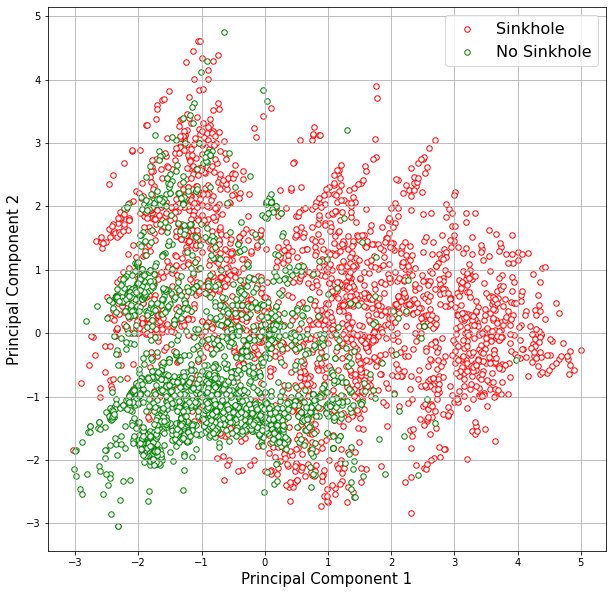

In [23]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

# ax.set_title('2 component PCA', fontsize = 20)

targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Sinkhole'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c = 'white',
# c = color,
               edgecolors = color,
               s = 30,
# alpha = 0.25
              )
ax.legend(['Sinkhole','No Sinkhole'], fontsize =16)
ax.grid()
plt.savefig(os.path.join('C:\\Users\\MUILI OLANREWAJU\\Research Thesis\\Data\\Processed data\\figures','pca.png'), dpi = 300)

# Model building 

In [23]:
# Splitting dataset for training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Machine learning algorithms

In [24]:
# Importing required machine learning modules
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve

## - Random Forest

In [25]:
# Hyperparameter optimization for random forest
model = RandomForestClassifier(random_state=0)
param_grid = { 
    'n_estimators': [200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.arange(10,30,2),
    'criterion' :['gini', 'entropy']
}
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X_train, y_train.ravel())

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

Best score: 0.9592495579497655
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'auto', 'n_estimators': 400}


In [26]:
# Train on opmtimal hyperparameters
rf = RandomForestClassifier(random_state=0, criterion=criterion, max_depth=max_depth, max_features=max_features, n_estimators = n_estimators).fit(X_train, y_train.ravel())

In [27]:
# Get predictions and probabilities on test set
rf_pred = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)

In [28]:
rf_conf_mat = confusion_matrix(y_test, rf_pred)
rf_acc = accuracy_score(y_test, rf_pred)
rf_roc_auc = roc_auc_score(y_test, rf_proba[:,1])

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:,1])
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_proba[:,1])

rf_cls_precision, rf_cls_recall, rf_cls_f1, _ = precision_recall_fscore_support(y_test, rf_pred, average=None, labels=[0,1])

print('Random Forest :')
print('\nConfusion matrix:\n',rf_conf_mat,'\n')
tn, fp, fn, tp = rf_conf_mat.ravel()
print('TN: ', tn,' FP: ', fp,' FN: ', fn,' TP: ', tp)
print('Accuracy:',rf_acc)
print('ROC AUC=%.4f' % (rf_roc_auc))
print('Precision on (Sinkhole = 0) = %.4f ' % (rf_cls_precision[0]))
print('Recall on (Sinkhole = 0) = %.4f ' % (rf_cls_recall[0]))
print('F1 on (Sinkhole = 0) = %.4f' % (rf_cls_f1[0]))
print('Precision on (Sinkhole = 1) = %.4f ' % (rf_cls_precision[1]))
print('Recall on (Sinkhole = 1) = %.4f ' % (rf_cls_recall[1]))
print('F1 on (Sinkhole = 1) = %.4f ' % (rf_cls_f1[1]))

Random Forest :

Confusion matrix:
 [[578  19]
 [ 13 684]] 

TN:  578  FP:  19  FN:  13  TP:  684
Accuracy: 0.9752704791344667
ROC AUC=0.9952
Precision on (Sinkhole = 0) = 0.9780 
Recall on (Sinkhole = 0) = 0.9682 
F1 on (Sinkhole = 0) = 0.9731
Precision on (Sinkhole = 1) = 0.9730 
Recall on (Sinkhole = 1) = 0.9813 
F1 on (Sinkhole = 1) = 0.9771 


## - K Nearest Neighbors

In [29]:
# Hyperparameter optimization for k-nearest neighbor
model = KNeighborsClassifier()
param_grid = { 
    'n_neighbors': [3,5,11,19],
    'weights': ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan'],
}
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X_train, y_train.ravel())

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

Best score: 0.9503025710300594
Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [30]:
# Train on opmtimal hyperparameters
knn = KNeighborsClassifier(metric=metric, n_neighbors=n_neighbors, weights=weights).fit(X_train, y_train.ravel())

In [31]:
# Get predictions and probabilities on test set
knn_pred = knn.predict(X_test)
knn_proba = knn.predict_proba(X_test)

In [32]:
# Get performance metrics
knn_conf_mat = confusion_matrix(y_test, knn_pred)
knn_acc = accuracy_score(y_test, knn_pred)
knn_roc_auc = roc_auc_score(y_test, knn_proba[:,1])

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_proba[:,1])
knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_proba[:,1])

knn_cls_precision, knn_cls_recall, knn_cls_f1, _ = precision_recall_fscore_support(y_test, knn_pred, average=None, labels=[0,1])



print('k Nearest Neighbors:')
print('\nConfusion matrix:\n',knn_conf_mat,'\n')
tn, fp, fn, tp = knn_conf_mat.ravel()
print('TN: ', tn,' FP: ', fp,' FN: ', fn,' TP: ', tp)
print('Accuracy:',knn_acc)
print('ROC AUC=%.4f' % (knn_roc_auc))
print('Precision on (Sinkhole = 0) = %.4f ' % (knn_cls_precision[0]))
print('Recall on (Sinkhole = 0) = %.4f ' % (knn_cls_recall[0]))
print('F1 on (Sinkhole = 0) = %.4f' % (knn_cls_f1[0]))
print('Precision on (Sinkhole = 1) = %.4f ' % (knn_cls_precision[1]))
print('Recall on (Sinkhole = 1) = %.4f ' % (knn_cls_recall[1]))
print('F1 on (Sinkhole = 1) = %.4f ' % (knn_cls_f1[1]))

k Nearest Neighbors:

Confusion matrix:
 [[553  44]
 [ 18 679]] 

TN:  553  FP:  44  FN:  18  TP:  679
Accuracy: 0.9520865533230294
ROC AUC=0.9731
Precision on (Sinkhole = 0) = 0.9685 
Recall on (Sinkhole = 0) = 0.9263 
F1 on (Sinkhole = 0) = 0.9469
Precision on (Sinkhole = 1) = 0.9391 
Recall on (Sinkhole = 1) = 0.9742 
F1 on (Sinkhole = 1) = 0.9563 


## - Logistic Regression

In [33]:
np.logspace(-3,3,7)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [34]:
# Hyperparameter optimization for logistic regression
model = LogisticRegression(random_state=0, solver = 'liblinear')
param_grid={'C':np.logspace(-3,3,7), # inverse of regularization strength
     }
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X_train, y_train.ravel())
C = grid.best_estimator_.C

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

Best score: 0.8687868603999869
Best hyperparameters: {'C': 1.0}


In [35]:
# Train on opmtimal hyperparameters
lr = LogisticRegression(random_state =0, solver = 'liblinear', C=C).fit(X_train,y_train.ravel())

In [36]:
# Get predictions and probabilities on test set
lr_pred = lr.predict(X_test)
lr_proba = lr.predict_proba(X_test)

In [37]:
# Get performance metrics

lr_conf_mat = confusion_matrix(y_test, lr_pred)
lr_acc = accuracy_score(y_test, lr_pred)
lr_roc_auc = roc_auc_score(y_test, lr_proba[:,1])

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba[:,1])
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_proba[:,1])

lr_cls_precision, lr_cls_recall, lr_cls_f1, _ = precision_recall_fscore_support(y_test, lr_pred, average=None, labels=[0,1])
print('Logistic Regression:')
print('\nConfusion matrix:\n',lr_conf_mat,'\n')
tn, fp, fn, tp = lr_conf_mat.ravel()
print('TN: ', tn,' FP: ', fp,' FN: ', fn,' TP: ', tp)
print('Accuracy:',lr_acc)
print('ROC AUC=%.4f' % (lr_roc_auc))
print('Precision on (Sinkhole = 0) = %.4f ' % (lr_cls_precision[0]))
print('Recall on (Sinkhole = 0) = %.4f ' % (lr_cls_recall[0]))
print('F1 on (Sinkhole = 0) = %.4f' % (lr_cls_f1[0]))
print('Precision on (Sinkhole = 1) = %.4f ' % (lr_cls_precision[1]))
print('Recall on (Sinkhole = 1) = %.4f ' % (lr_cls_recall[1]))
print('F1 on (Sinkhole = 1) = %.4f ' % (lr_cls_f1[1]))

Logistic Regression:

Confusion matrix:
 [[498  99]
 [ 63 634]] 

TN:  498  FP:  99  FN:  63  TP:  634
Accuracy: 0.874806800618238
ROC AUC=0.9243
Precision on (Sinkhole = 0) = 0.8877 
Recall on (Sinkhole = 0) = 0.8342 
F1 on (Sinkhole = 0) = 0.8601
Precision on (Sinkhole = 1) = 0.8649 
Recall on (Sinkhole = 1) = 0.9096 
F1 on (Sinkhole = 1) = 0.8867 


## - Support Vector Machine

In [38]:
# Hyperparameter optimization for support vector machine
model = SVC(random_state=0, probability=True)
param_grid={'C':np.logspace(-3,3,7),
            'kernel': ['poly', 'rbf', 'sigmoid'],
          'gamma': [0.001, 0.01, 1],
           }
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X_train, y_train.ravel())

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

Best score: 0.9450023612621221
Best hyperparameters: {'C': 1000.0, 'gamma': 0.01, 'kernel': 'rbf'}


In [39]:
# Train on opmtimal hyperparameters
svm = SVC(random_state =0, probability = True, C=C,  gamma =gamma, kernel = kernel).fit(X_train,y_train.ravel())

In [40]:
# Get predictions and probabilities on test set
svm_pred = svm.predict(X_test)
svm_proba = svm.predict_proba(X_test)

In [41]:
# Get performance metrics

svm_conf_mat = confusion_matrix(y_test, svm_pred)
svm_acc = accuracy_score(y_test, svm_pred)
svm_roc_auc = roc_auc_score(y_test, svm_proba[:,1])

svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_proba[:,1])
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_proba[:,1])

svm_cls_precision, svm_cls_recall, svm_cls_f1, _ = precision_recall_fscore_support(y_test, svm_pred, average=None, labels=[0,1])
print('Support Vector Machine :')
print('\nConfusion matrix:\n',svm_conf_mat,'\n')
tn, fp, fn, tp = svm_conf_mat.ravel()
print('TN: ', tn,' FP: ', fp,' FN: ', fn,' TP: ', tp)
print('Accuracy:',svm_acc)
print('ROC AUC=%.4f' % (svm_roc_auc))
print('Precision on (Sinkhole = 0) = %.4f ' % (svm_cls_precision[0]))
print('Recall on (Sinkhole = 0) = %.4f ' % (svm_cls_recall[0]))
print('F1 on (Sinkhole = 0) = %.4f' % (svm_cls_f1[0]))
print('Precision on (Sinkhole = 1) = %.4f ' % (svm_cls_precision[1]))
print('Recall on (Sinkhole = 1) = %.4f ' % (svm_cls_recall[1]))
print('F1 on (Sinkhole = 1) = %.4f ' % (svm_cls_f1[1]))

Support Vector Machine :

Confusion matrix:
 [[569  28]
 [ 25 672]] 

TN:  569  FP:  28  FN:  25  TP:  672
Accuracy: 0.9590417310664606
ROC AUC=0.9868
Precision on (Sinkhole = 0) = 0.9579 
Recall on (Sinkhole = 0) = 0.9531 
F1 on (Sinkhole = 0) = 0.9555
Precision on (Sinkhole = 1) = 0.9600 
Recall on (Sinkhole = 1) = 0.9641 
F1 on (Sinkhole = 1) = 0.9621 


## - Multilayer Perceptron Neural Network

In [42]:
# Hyperparameter optimization multilayer perceptron neural network
10.0 ** -np.arange(1, 5)
np.arange(10, 50, 5)
model = MLPClassifier(random_state=0, max_iter=1000)
param_grid={
            'hidden_layer_sizes': np.arange(10, 50,5),
            'activation': ['identity', 'logistic', 'tanh', 'relu'],
            'alpha' : 10.0 ** -np.arange(1, 5),
            'learning_rate': ['constant', 'adaptive']
           }
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X_train, y_train.ravel())

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

C:\Users\MUILIOLANREWAJU\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MUILIOLANREWAJU\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MUILIOLANREWAJU\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MUILIOLANREWAJU\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MUILIOLANREWAJU\ana

Best score: 0.9565978056736186
Best hyperparameters: {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': 45, 'learning_rate': 'constant'}


C:\Users\MUILIOLANREWAJU\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [43]:
# Train on optimal hyperparameters
mlp = MLPClassifier(random_state=0, max_iter = 1000, activation = activation, alpha = alpha, hidden_layer_sizes = hidden_layer_sizes, learning_rate=learning_rate).fit(X_train, y_train.ravel())

C:\Users\MUILIOLANREWAJU\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [44]:
# Get predictions and probabilities on test set
mlp_pred = mlp.predict(X_test)
mlp_proba = mlp.predict_proba(X_test)

In [45]:
# Get performance metrics

mlp_conf_mat = confusion_matrix(y_test, mlp_pred)
mlp_acc = accuracy_score(y_test, mlp_pred)
mlp_roc_auc = roc_auc_score(y_test, mlp_proba[:,1])

mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_proba[:,1])
mlp_precision, mlp_recall, _ = precision_recall_curve(y_test, mlp_proba[:,1])

mlp_cls_precision, mlp_cls_recall, mlp_cls_f1, _ = precision_recall_fscore_support(y_test, mlp_pred, average=None, labels=[0,1])

print('Multi Layer Perceptron :')
print('\nConfusion matrix:\n',mlp_conf_mat,'\n')
tn, fp, fn, tp = mlp_conf_mat.ravel()
print('TN: ', tn,' FP: ', fp,' FN: ', fn,' TP: ', tp)
print('Accuracy:',mlp_acc)
print('ROC AUC=%.4f' % (mlp_roc_auc))
print('Precision on (Sinkhole = 0) = %.4f ' % (mlp_cls_precision[0]))
print('Recall on (Sinkhole = 0) = %.4f ' % (mlp_cls_recall[0]))
print('F1 on (Sinkhole = 0) = %.4f' % (mlp_cls_f1[0]))
print('Precision on (Sinkhole = 1) = %.4f ' % (mlp_cls_precision[1]))
print('Recall on (Sinkhole = 1) = %.4f ' % (mlp_cls_recall[1]))
print('F1 on (Sinkhole = 1) = %.4f ' % (mlp_cls_f1[1]))

Multi Layer Perceptron :

Confusion matrix:
 [[568  29]
 [ 17 680]] 

TN:  568  FP:  29  FN:  17  TP:  680
Accuracy: 0.964451313755796
ROC AUC=0.9919
Precision on (Sinkhole = 0) = 0.9709 
Recall on (Sinkhole = 0) = 0.9514 
F1 on (Sinkhole = 0) = 0.9611
Precision on (Sinkhole = 1) = 0.9591 
Recall on (Sinkhole = 1) = 0.9756 
F1 on (Sinkhole = 1) = 0.9673 


## Export trained and tested models

In [50]:
import joblib

joblib.dump(knn, os.path.join('..','models','knn.pkl'), compress=9)
joblib.dump(lr, os.path.join('..','models','lr.pkl'), compress=9)
joblib.dump(svm, os.path.join('..','models','svm.pkl'), compress=9)
joblib.dump(mlp, os.path.join('..','models','mlp.pkl'), compress=9)
joblib.dump(rf, os.path.join('..','models','rf.pkl'), compress=9)

['..\\models\\rf.pkl']

## Export performance metrics of models

In [51]:
perf_metr = pd.DataFrame(index = ['K Nearest Neighbors',
                        'Logistic Regression',
                        'Support Vector Machine',
                        'Multi Layer Perceptron',
                        'Random Forest',
                       ],
             columns = ['Accuracy', 
                        'ROC AUC', 
                        'Precision on Sinkhole=0', 
                        'Recall on Sinkhole=0', 
                        'F1-score on Sinkhole=0', 
                        'Precision on Sinkhole=1', 
                        'Recall on Sinkhole=1', 
                        'F1-score on Sinkhole=1']
            )

In [52]:
knn_perf_metr = pd.Series([knn_acc, knn_roc_auc, knn_cls_precision[0], knn_cls_recall[0], knn_cls_f1[0], knn_cls_precision[0],knn_cls_recall[0], knn_cls_f1[0]])
lr_perf_metr = pd.Series([lr_acc, lr_roc_auc, lr_cls_precision[0], lr_cls_recall[0], lr_cls_f1[0], lr_cls_precision[0],lr_cls_recall[0], lr_cls_f1[0]])
svm_perf_metr = pd.Series([svm_acc, svm_roc_auc, svm_cls_precision[0], svm_cls_recall[0], svm_cls_f1[0], svm_cls_precision[0],svm_cls_recall[0], svm_cls_f1[0]])
mlp_perf_metr = pd.Series([mlp_acc, mlp_roc_auc, mlp_cls_precision[0], mlp_cls_recall[0], mlp_cls_f1[0], mlp_cls_precision[0],mlp_cls_recall[0], mlp_cls_f1[0]])
rf_perf_metr = pd.Series([rf_acc, rf_roc_auc, rf_cls_precision[0], rf_cls_recall[0], rf_cls_f1[0], rf_cls_precision[0],rf_cls_recall[0], rf_cls_f1[0]])

In [53]:
perf_metr.loc['K Nearest Neighbors',:] = knn_perf_metr.values
perf_metr.loc['Logistic Regression',:] = lr_perf_metr.values
perf_metr.loc[ 'Support Vector Machine',:] = svm_perf_metr.values
perf_metr.loc['Multi Layer Perceptron',:] = mlp_perf_metr.values
perf_metr.loc['Random Forest',:] = rf_perf_metr.values

In [54]:
perf_metr = perf_metr.astype(float).round(4)
perf_metr

,Accuracy,ROC AUC,Precision on Sinkhole=0,Recall on Sinkhole=0,F1-score on Sinkhole=0,Precision on Sinkhole=1,Recall on Sinkhole=1,F1-score on Sinkhole=1
K Nearest Neighbors,0.9521,0.9731,0.9685,0.9263,0.9469,0.9685,0.9263,0.9469
Logistic Regression,0.8748,0.9243,0.8877,0.8342,0.8601,0.8877,0.8342,0.8601
Support Vector Machine,0.9590,0.9868,0.9579,0.9531,0.9555,0.9579,0.9531,0.9555
Multi Layer Perceptron,0.9645,0.9919,0.9709,0.9514,0.9611,0.9709,0.9514,0.9611
Random Forest,0.9753,0.9952,0.9780,0.9682,0.9731,0.9780,0.9682,0.9731


In [57]:
perf_metr.to_csv(os.path.join('..','data','performance_metrics.csv'))

## ROC-AUC curves

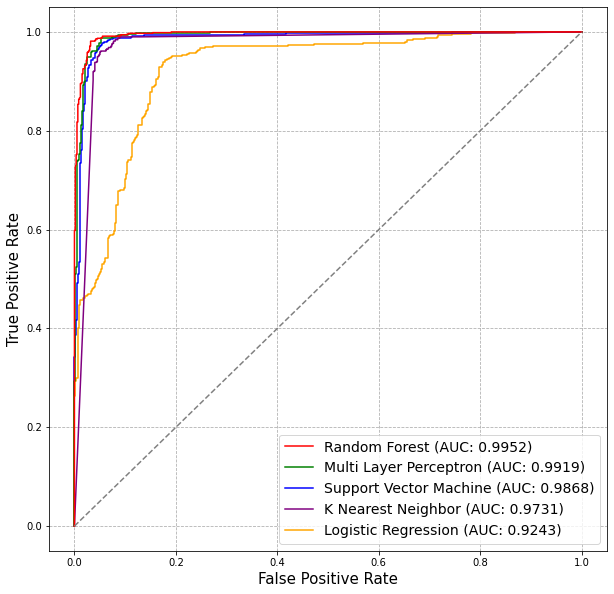

In [59]:
# calculate roc curves

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba[:,1])
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_proba[:,1])
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_proba[:,1])
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:,1])

fig, ax = plt.subplots(1, figsize=(10,10))

# fig.figure(figsize=(10,10))

# plot the roc curve for the models
ax.plot(svm_fpr, svm_tpr,  color = 'blue', label='Support Vector Machine (AUC: ' + str(np.round(svm_roc_auc,4))+')')
ax.plot(lr_fpr, lr_tpr,  color = 'orange', label='Logistic Regression (AUC: ' + str(np.round(lr_roc_auc,4))+')')
ax.plot(mlp_fpr, mlp_tpr, color = 'green', label='Multi Layer Perceptron (AUC: ' + str(np.round(mlp_roc_auc,4))+')')
ax.plot(knn_fpr, knn_tpr,  color = 'purple',label='K Nearest Neighbor (AUC: ' + str(np.round(knn_roc_auc,4))+')')
ax.plot(rf_fpr, rf_tpr,  color = 'red', label='Random Forest (AUC: ' + str(np.round(rf_roc_auc,4))+')')
ax.plot([0,1],[0,1], color='grey', linestyle='dashed')

# axis labels
ax.set_xlabel('False Positive Rate', fontsize=15)
ax.set_ylabel('True Positive Rate', fontsize=15)

# show the legend
# plt.legend()

handles,labels = ax.get_legend_handles_labels()


handles = [handles[4], handles[2], handles[0], handles[3], handles[1]]
labels = [labels[4], labels[2], labels[0], labels[3], labels[1]]

ax.grid(linestyle='dashed')
ax.legend(handles,labels, fontsize=14)

plt.savefig(os.path.join('..','figures','roc-auc.png'), dpi = 500)
# show the plot
plt.show()

# Prediction

In [52]:
knn = joblib.load(os.path.join('models','knn.pkl'))
lr = joblib.load(os.path.join('models','lr.pkl'))
svm = joblib.load(os.path.join('models','svm.pkl'))
mlp = joblib.load(os.path.join('models','mlp.pkl'))
rf = joblib.load(os.path.join('models','rf.pkl'))